### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset and get to know it

In [2]:
data = pd.read_csv('measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
print(data.info())
# object types for numerical values
# needs to be corrected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB
None


In [4]:
# CHANGE DATATYPES
# distance', 'consume', 'temp_inside', 'refill liters

wrong_dtype = ['distance', 'consume', 'temp_inside', 'refill liters']
data[wrong_dtype] = data[wrong_dtype].apply(pd.to_numeric, errors='coerce')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       52 non-null     float64
 1   consume        49 non-null     float64
 2   speed          388 non-null    int64  
 3   temp_inside    169 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  8 non-null      float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB
None


In [5]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,NaN,12,NaN,E10,0,0,0,45.0,E10
1,12.0,NaN,30,NaN,13,NaN,E10,0,0,0,NaN,NaN
2,NaN,NaN,38,NaN,15,NaN,E10,0,0,0,NaN,NaN
3,NaN,NaN,36,NaN,14,NaN,E10,0,0,0,NaN,NaN
4,NaN,NaN,46,NaN,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,NaN,39,NaN,18,NaN,SP98,0,0,0,NaN,NaN
384,NaN,NaN,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,NaN,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,NaN,NaN,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


### Cleaning the dataset and Exploratory Analysis

In [6]:
display(data.info)

<bound method DataFrame.info of      distance  consume  speed  temp_inside  temp_outside specials gas_type  \
0        28.0      5.0     26          NaN            12      NaN      E10   
1        12.0      NaN     30          NaN            13      NaN      E10   
2         NaN      NaN     38          NaN            15      NaN      E10   
3         NaN      NaN     36          NaN            14      NaN      E10   
4         NaN      NaN     46          NaN            15      NaN      E10   
..        ...      ...    ...          ...           ...      ...      ...   
383      16.0      NaN     39          NaN            18      NaN     SP98   
384       NaN      NaN     38         25.0            31       AC     SP98   
385      16.0      NaN     45         25.0            19      NaN     SP98   
386       NaN      NaN     42         25.0            31       AC     SP98   
387       NaN      5.0     25         25.0            30       AC     SP98   

     AC  rain  sun  refill lite

In [7]:
display(data.describe())

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,52.000000,49.000000,388.000000,169.000000,388.000000,388.000000,388.000000,388.000000,8.00000
mean,19.596154,4.816327,41.927835,21.934911,11.358247,0.077320,0.123711,0.082474,36.75000
std,27.855552,0.858134,13.598524,1.230283,6.991542,0.267443,0.329677,0.275441,11.22179
min,2.000000,4.000000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.00000
25%,14.000000,4.000000,32.750000,22.000000,7.000000,0.000000,0.000000,0.000000,37.75000
50%,16.000000,5.000000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,39.00000
75%,17.000000,5.000000,50.000000,22.000000,16.000000,0.000000,0.000000,0.000000,42.00000
max,211.000000,9.000000,90.000000,25.000000,31.000000,1.000000,1.000000,1.000000,45.00000


In [8]:
def nulls_percent (df):
    
    nulls_percent = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
    nulls_percent.columns = ['column_name', 'nulls_percentage']
    
    return nulls_percent

In [9]:
nulls_percent(data)

,column_name,nulls_percentage
0,distance,0.865979
1,consume,0.873711
2,speed,0.000000
3,temp_inside,0.564433
4,temp_outside,0.000000
5,specials,0.760309
6,gas_type,0.000000
7,AC,0.000000
8,rain,0.000000
9,sun,0.000000


In [10]:
# drop columns that have higher percentage of NaNs than > 75 % -> cutoff point

In [11]:
# drop refill gas, specials, consume, distance and refill liters
# percentage of nulls is too high!
# > 75 %

In [12]:
data = data.drop(['specials','refill liters','refill gas', 'consume', 'distance'],axis=1)
data.head()

,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,26,NaN,12,E10,0,0,0
1,30,NaN,13,E10,0,0,0
2,38,NaN,15,E10,0,0,0
3,36,NaN,14,E10,0,0,0
4,46,NaN,15,E10,0,0,0


In [13]:
# what to do with temp_inside?
# i will keep it and fill the NaNs with the mode (mean gave me an error)
# not the prettiest solution since percentage of NaN values was pretty high

data['temp_inside'].fillna(data['temp_inside'].mode()[0], inplace=True)


In [14]:
nulls_percent(data)

,column_name,nulls_percentage
0,speed,0.0
1,temp_inside,0.0
2,temp_outside,0.0
3,gas_type,0.0
4,AC,0.0
5,rain,0.0
6,sun,0.0


In [15]:
data.isna().sum()

speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   speed         388 non-null    int64  
 1   temp_inside   388 non-null    float64
 2   temp_outside  388 non-null    int64  
 3   gas_type      388 non-null    object 
 4   AC            388 non-null    int64  
 5   rain          388 non-null    int64  
 6   sun           388 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 21.3+ KB
None


In [17]:
data.head()

,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,26,22.0,12,E10,0,0,0
1,30,22.0,13,E10,0,0,0
2,38,22.0,15,E10,0,0,0
3,36,22.0,14,E10,0,0,0
4,46,22.0,15,E10,0,0,0


In [18]:
# rename columns to lower case

# gas = gas.rename(columns=gas.iloc[0]).loc[1:]
# gas.columns=[col.lower().replace(' ','_')for col in gas.columns] 
# gas.columns

In [19]:
# Checking the value counts
def check_count(df):
    value_counts = []
    for column in df.columns:
        x = len(df[column].value_counts())
        value_counts.append(x)
    counts = pd.DataFrame(value_counts)
    counts = counts.reset_index()
    counts.columns = ['name', 'value_counts']
    for i in range(0, df.shape[1]):
        counts['name'] = counts['name'].replace(i,df.columns[i])
    return counts

In [20]:
data

,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,26,22.0,12,E10,0,0,0
1,30,22.0,13,E10,0,0,0
2,38,22.0,15,E10,0,0,0
3,36,22.0,14,E10,0,0,0
4,46,22.0,15,E10,0,0,0
...,...,...,...,...,...,...,...
383,39,22.0,18,SP98,0,0,0
384,38,25.0,31,SP98,1,0,0
385,45,25.0,19,SP98,0,0,0
386,42,25.0,31,SP98,1,0,0


In [21]:
# no more NaNs left

### How are the numerical features distributed

In [22]:
# Distinction between Numerical continuous, Numerical discrete and Categorical features.
# numerical_continuous = gas.select_dtypes(['number'])
# numerical_continuous = numerical_continuous.drop(['AC', 'rain', 'sun'], axis=1)
# display(numerical_continuous.head())

# numerical_discrete = gas.select_dtypes('int64')
# numerical_discrete = numerical_discrete.drop(['speed', 'temp_outside'], axis=1)
# display(numerical_discrete.head())

# categorical = gas.select_dtypes(['object'])
# display(categorical.head())

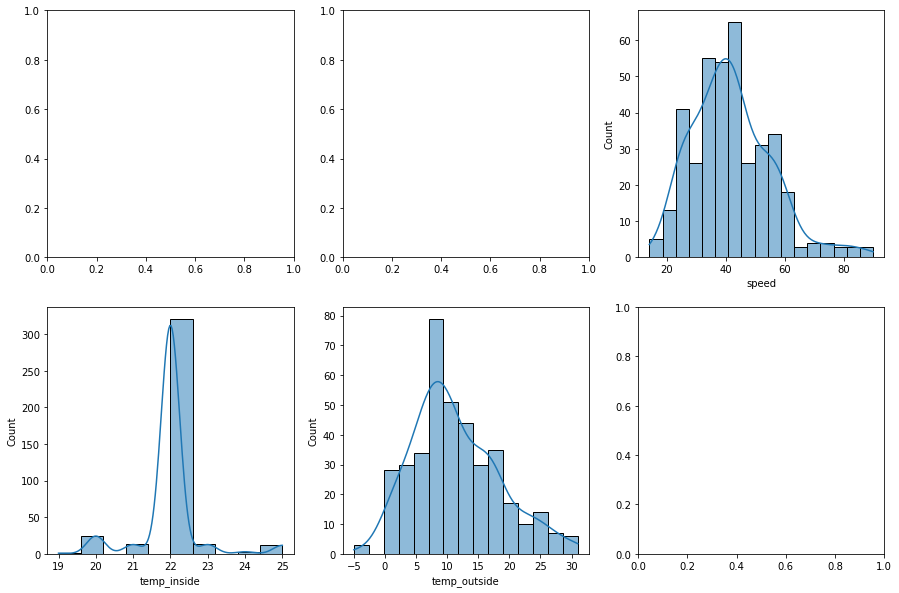

In [23]:
# Distribution of the numerical features
fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.histplot(data['temp_inside'], kde=True, ax = ax[1,0]);
sns.histplot(data['temp_outside'], kde=True, ax = ax[1,1]);
sns.histplot(data['speed'], kde=True, ax = ax[0,2]);


### Check for Imbalance

[Text(0.5, 0, 'Gas type'), Text(0, 0.5, 'Count')]

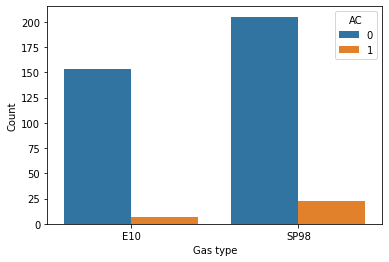

In [24]:
fig = sns.countplot(x=data['gas_type'], hue='AC', data=data)
fig.set(xlabel='Gas type', ylabel='Count')

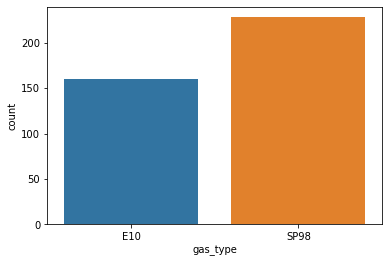

In [25]:
sns.countplot(x=data['gas_type'], data=data)
plt.show()

[Text(0.5, 0, 'Gas type'), Text(0, 0.5, 'Count')]

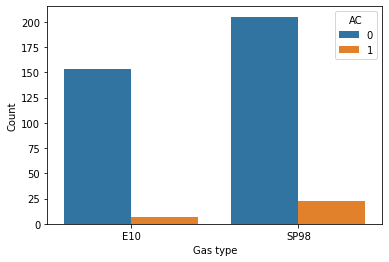

In [26]:
fig = sns.countplot(x=data['gas_type'], hue='AC', data=data)
fig.set(xlabel='Gas type', ylabel='Count')

In [27]:
# it could be beneficial to the analysis to add E10 samples 
# i will not treat it since the imbalance is not significant
# also the time limit makes me want to focus on completing as many tasks as possible, so this is why I will move on

### Group by gas type

In [28]:
E10 = data[data['gas_type']=='E10']
SP98 = data[data['gas_type']=='SP98']
print(' ---  Statistics of E10: ---')
display(E10.describe())
print(' --- Statistics of SP98: ---')
display(SP98.describe())

 ---  Statistics of E10: ---


,speed,temp_inside,temp_outside,AC,rain,sun
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,43.506250,22.043750,10.118750,0.043750,0.100000,0.075000
std,14.077949,0.480394,6.392185,0.205181,0.300942,0.264218
min,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000
25%,35.000000,22.000000,6.000000,0.000000,0.000000,0.000000
50%,42.000000,22.000000,9.000000,0.000000,0.000000,0.000000
75%,51.000000,22.000000,14.250000,0.000000,0.000000,0.000000
max,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000


 --- Statistics of SP98: ---


,speed,temp_inside,temp_outside,AC,rain,sun
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,40.820175,21.921053,12.228070,0.100877,0.140351,0.087719
std,13.170122,0.976776,7.271373,0.301829,0.348115,0.283509
min,16.000000,19.000000,-3.000000,0.000000,0.000000,0.000000
25%,32.000000,22.000000,7.000000,0.000000,0.000000,0.000000
50%,39.500000,22.000000,11.000000,0.000000,0.000000,0.000000
75%,48.000000,22.000000,17.000000,0.000000,0.000000,0.000000
max,90.000000,25.000000,31.000000,1.000000,1.000000,1.000000


In [29]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   speed         388 non-null    int64  
 1   temp_inside   388 non-null    float64
 2   temp_outside  388 non-null    int64  
 3   gas_type      388 non-null    object 
 4   AC            388 non-null    int64  
 5   rain          388 non-null    int64  
 6   sun           388 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 21.3+ KB


None

### Further plotting

[Text(0.5, 0, 'Gas type'),
 Text(0, 0.5, 'Temperature Outside'),
 Text(0.5, 1.0, 'Consume by gas type')]

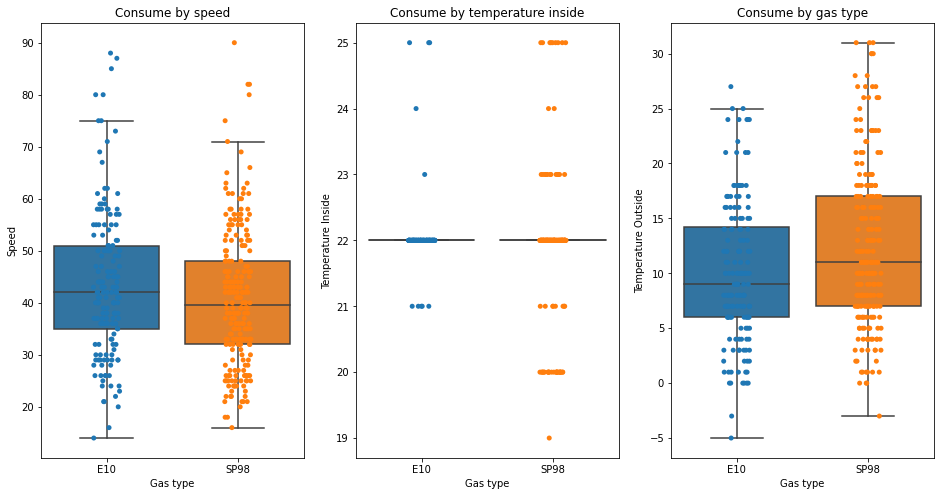

In [30]:
fig = plt.figure(figsize=(16,8))

# plot: gas type * speed
ax = fig.add_subplot(1,3,1)
speed = sns.boxplot(x='gas_type', y='speed', data=data, showfliers=False, ax=ax)
speed = sns.stripplot(x='gas_type', y='speed', data=data, jitter=True, ax=ax)

# plot: gas_type * temp_inside
ax = fig.add_subplot(1,3,2)
temp_inside = sns.boxplot(x='gas_type', y='temp_inside', data=data, showfliers=False, ax=ax)
temp_inside = sns.stripplot(x='gas_type', y='temp_inside', data=data, jitter=True, ax=ax)

# plot: gas_type * temp_outside
ax = fig.add_subplot(1,3,3)
temp_outside = sns.boxplot(x='gas_type', y='temp_outside', data=data, showfliers=False, ax=ax)
temp_outside = sns.stripplot(x='gas_type', y='temp_outside', data=data, jitter=True, ax=ax)

speed.set(xlabel = "Gas type", ylabel = "Speed", title = 'Consume by speed')
temp_inside.set(xlabel = "Gas type", ylabel = "Temperature Inside", title = 'Consume by temperature inside')
temp_outside.set(xlabel = "Gas type", ylabel = "Temperature Outside", title = 'Consume by gas type')

[Text(0.5, 0, 'not sunny = 0, Sunny = 1'),
 Text(0, 0.5, 'Speed'),
 Text(0.5, 1.0, 'Speed: Sunny days / Not sunny days')]

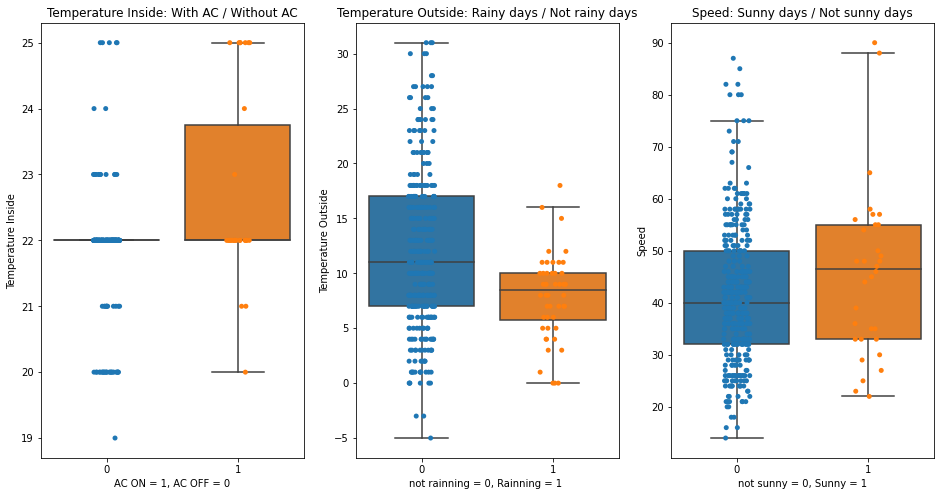

In [31]:
fig = plt.figure(figsize=(16,8))

# gas type x consume
ax = fig.add_subplot(1,3,1)
temp_inside = sns.boxplot(x='AC', y='temp_inside', data=data, showfliers=False, ax=ax)
temp_inside = sns.stripplot(x='AC', y='temp_inside', data=data, jitter=True, ax=ax)

# gas_type x distance
ax = fig.add_subplot(1,3,2)
distance = sns.boxplot(x='rain', y='temp_outside', data=data, showfliers=False, ax=ax)
distance = sns.stripplot(x='rain', y='temp_outside', data=data, jitter=True, ax=ax)

# gas_type x speed
ax = fig.add_subplot(1,3,3)
speed = sns.boxplot(x='sun', y='speed', data=data, showfliers=False, ax=ax)
speed = sns.stripplot(x='sun', y='speed', data=data, jitter=True, ax=ax)

temp_inside.set(xlabel = "AC ON = 1, AC OFF = 0", ylabel = "Temperature Inside", title = 'Temperature Inside: With AC / Without AC')
distance.set(xlabel = "not rainning = 0, Rainning = 1 ", ylabel = "Temperature Outside", title = 'Temperature Outside: Rainy days / Not rainy days')
speed.set(xlabel = "not sunny = 0, Sunny = 1", ylabel = "Speed", title = 'Speed: Sunny days / Not sunny days')

### Numerical continous or numerical discrete / categorical features

In [32]:

numerical_continuous = data.select_dtypes(['number'])
numerical_continuous = numerical_continuous.drop(['AC', 'rain', 'sun'], axis=1)
display(numerical_continuous.head())

numerical_discrete = data.select_dtypes('int64')
numerical_discrete = numerical_discrete.drop(['speed', 'temp_outside'], axis=1)
display(numerical_discrete.head())

categorical = data.select_dtypes(['object'])
display(categorical.head())

,speed,temp_inside,temp_outside
0,26,22.0,12
1,30,22.0,13
2,38,22.0,15
3,36,22.0,14
4,46,22.0,15


,AC,rain,sun
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10


### Exploration

In [33]:
# NUMERICAL DATA

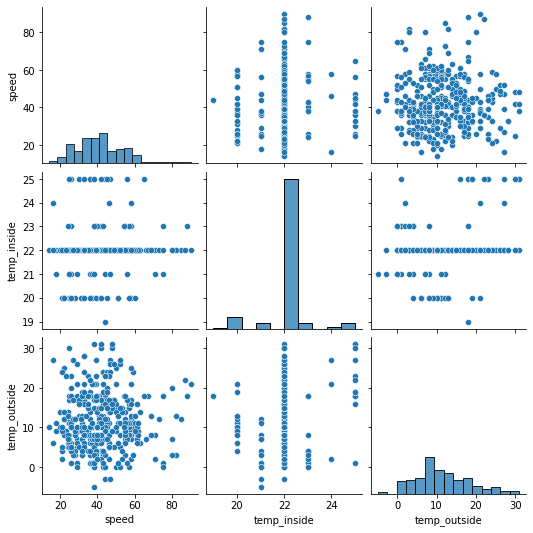

In [34]:
sns.pairplot(numerical_continuous)

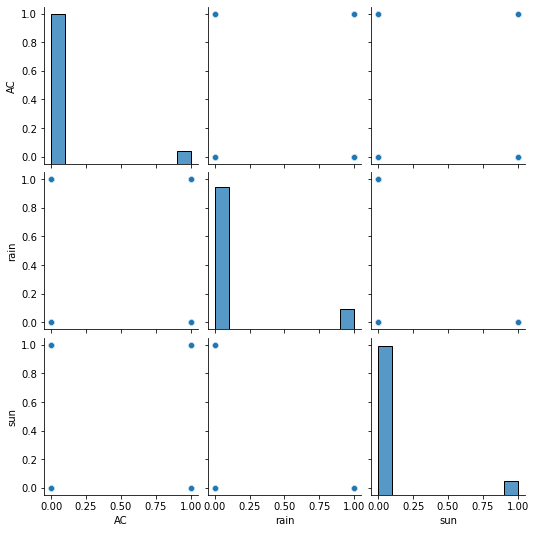

In [35]:
sns.pairplot(numerical_discrete)

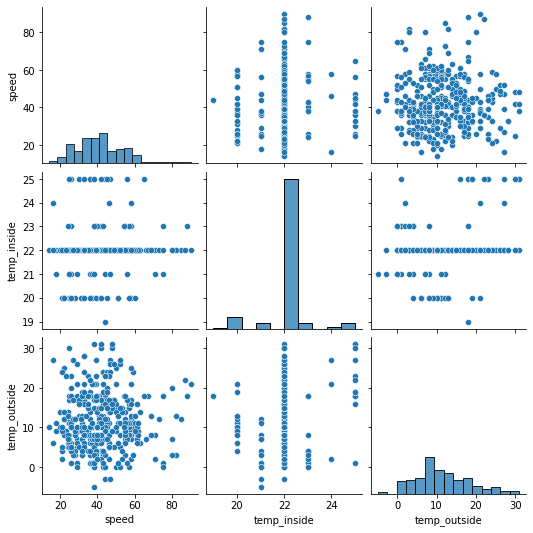

In [36]:
sns.pairplot(numerical_continuous)

### Check correlation

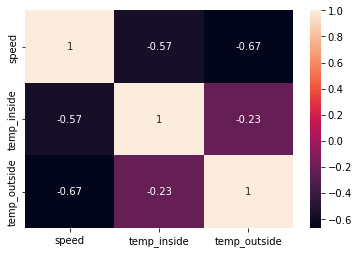

In [37]:
correlations_matrix = numerical_continuous.corr()
sns.heatmap(round(correlations_matrix.corr(), 2), annot=True)
plt.show()

### Linear regression

In [38]:
# label encoder for categorical features

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['gas_type'] = label_encoder.fit_transform(data['gas_type'])

In [39]:
# Train-test-split

from sklearn.model_selection import train_test_split

X = data.drop(columns='temp_outside').values
y = data['temp_outside']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1223)

In [40]:
# Standard Scaler for numerical features

from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

X_train_sscaled = sscaler.fit_transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

In [41]:
# Linear regression

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train_sscaled, y_train)
y_pred = lreg.predict(X_test_sscaled)

In [42]:
# Error Metrics

from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lr_mse = mean_squared_error(y_test, y_pred) 
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred)

lr_score_train = lreg.score(X_train_sscaled, y_train)
lr_score_test = lreg.score(X_test_sscaled, y_test)

In [43]:
print('MSE for the Linear Model is:', lr_mse)
print('RMSE for the Linear Model is:', lr_rmse)
print('MAE for the Linear Model is:', lr_mae)
print('Score for the train data and the Linear Model is:', lr_score_train)
print('Score for the test data and the Linear Model is:', lr_score_test)

MSE for the Linear Model is: 45.15943694216974
RMSE for the Linear Model is: 6.7200771529923475
MAE for the Linear Model is: 5.444172722478946
Score for the train data and the Linear Model is: 0.25224423742740565
Score for the test data and the Linear Model is: 0.07018061738718218


In [44]:
# Plots of regression with different coefficients

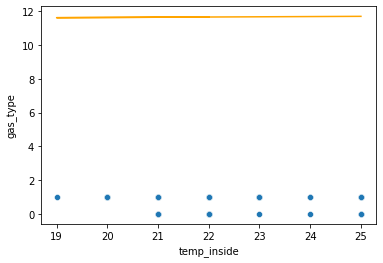

In [45]:
regression_line = lreg.intercept_ + lreg.coef_[0]*data['temp_inside']
plt.plot(data['temp_inside'], regression_line, c = 'orange')
sns.scatterplot(x='temp_inside',y='gas_type',data=data)
plt.show()

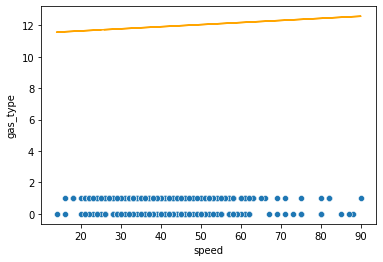

In [46]:
regression_line = lreg.intercept_ + lreg.coef_[0]*data['speed']
plt.plot(data['speed'], regression_line, c = 'orange')
sns.scatterplot(x='speed',y='gas_type',data=data)
plt.show()

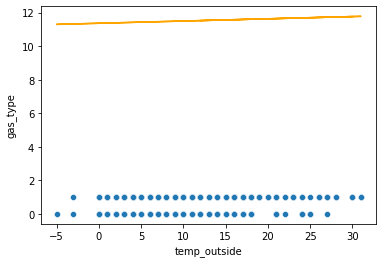

In [47]:
regression_line = lreg.intercept_ + lreg.coef_[0]*data['temp_outside']
plt.plot(data['temp_outside'], regression_line, c = 'orange')
sns.scatterplot(x='temp_outside',y='gas_type',data=data)
plt.show()

### Decision Tree

In [48]:
X = data.drop(['temp_outside'],axis=1)
y = data['temp_outside']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.40,random_state=100)

In [50]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

X_train_sscaled = sscaler.fit_transform(X_train)
X_test_sscaled = sscaler.transform(X_test)


In [51]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

X_train_mmscaled = minmaxscaler.fit_transform(X_train)
X_test_mmscaled = minmaxscaler.transform(X_test)

In [52]:
from sklearn.tree import DecisionTreeRegressor

data = DecisionTreeRegressor(criterion = 'friedman_mse', splitter = 'best', max_depth = 3, random_state = 60)
data.fit(X_train_sscaled, y_train)
data_decissiontree = data.predict(X_test_sscaled)

In [53]:
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, data_decissiontree)))
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, data_decissiontree))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, data_decissiontree))

Root Mean Squared Error(RMSE): 5.975221943340877
Mean Absolute Error(MAE): 4.78773773685834
Mean Squared Error(MSE): 35.703277272182326
